# Класифікація на основі дерева прийняття рішень
Розглянемо створення класифікатора на основі дерева прийняття рішень.

Імпортуємо необхідні інформаційні об'єкти.

In [1]:
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier

Створимо функцію `visualize_classifier` для візуалізації результатів роботи моделі.

In [2]:
def visualize_classifier(classifier, X, y, title: str, mesh_size: int = 100, predict_cmap=plt.cm.gray, edgecolors='black', linewidth=1, train_cmap=plt.cm.Paired):
    # Define the minimum and maximum values for X and Y
    # that will be used in the mesh grid
    delta_x = X[:, 0].max() - X[:, 0].min()
    delta_y = X[:, 1].max() - X[:, 1].min()
    delta_x = 1.0 if delta_x <= 0 else delta_x * 0.1
    delta_y = 1.0 if delta_y <= 0 else delta_y * 0.1
    min_x, max_x = X[:, 0].min() - delta_x, X[:, 0].max() + delta_x
    min_y, max_y = X[:, 1].min() - delta_y, X[:, 1].max() + delta_y
    # Define the mesh grid of X and Y values
    x_vals, y_vals = np.meshgrid(np.linspace(min_x, max_x, mesh_size), np.linspace(min_y, max_y, mesh_size))
    # Run the classifier on the mesh grid
    output = classifier.predict(np.c_[x_vals.ravel(), y_vals.ravel()])
    # Reshape the output array
    output = output.reshape(x_vals.shape)
    # Create a plot
    plt.figure()
    # Choose a color scheme for the plot 
    plt.pcolormesh(x_vals, y_vals, output, cmap=predict_cmap)
    # Overlay the training points on the plot 
    plt.scatter(X[:, 0], X[:, 1], c=y, s=75, edgecolors=edgecolors, linewidth=linewidth, cmap=train_cmap)
    # Specify the boundaries of the plot
    plt.xlim(x_vals.min(), x_vals.max())
    plt.ylim(y_vals.min(), y_vals.max())
    if title:
        plt.title(title)
    plt.show()

Завантажимо дані із файлу

In [3]:
data = np.loadtxt("data/data_multivar_nb.txt", delimiter=',')
X, y = data[:, :-1], data[:, -1] 

Розділимо дані на множини для навчання та тестування

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3)

Створимо дерево прийняття рішень

In [5]:
params = {'random_state': 0, 'max_depth': 4}
classifier = DecisionTreeClassifier(**params)

Виконуємо навчання дерева прийняття рішень.

In [6]:
classifier.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=0)

Побудуємо діаграму класифікації на виборці для навчання

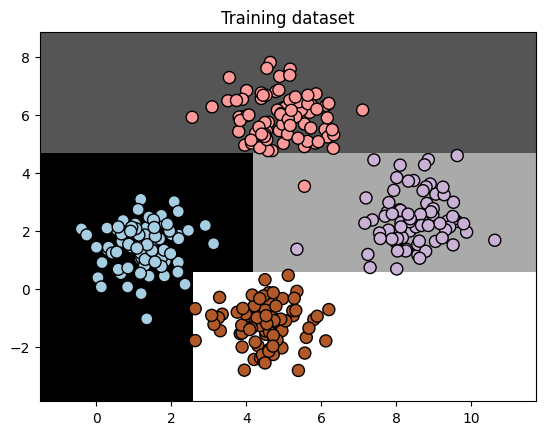

In [7]:
visualize_classifier(classifier, X_train, y_train, 'Training dataset')

Побудуємо діаграму класифікації на виборці для тестування

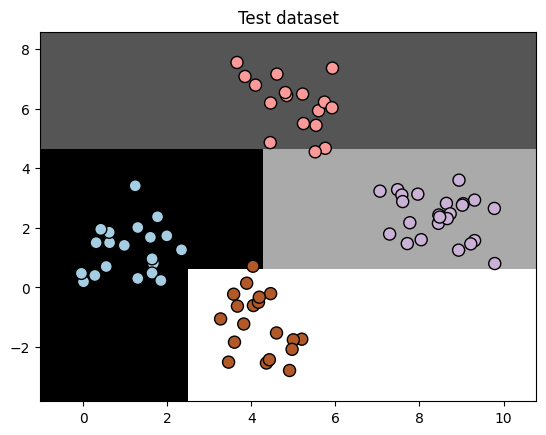

In [8]:
visualize_classifier(classifier, X_test, y_test, 'Test dataset')

Зробимо оцінку точності

In [9]:
num_folds = 3
accuracy_values = cross_val_score(
    classifier, 
    X, 
    y, 
    scoring='accuracy', 
    cv=num_folds
)
print("Accuracy: " + str(round(100*accuracy_values.mean(), 2)) + "%")

precision_values = cross_val_score(classifier, 
        X, y, scoring='precision_weighted', cv=num_folds)
print("Precision: " + str(round(100*precision_values.mean(), 2)) + "%")

recall_values = cross_val_score(classifier, 
        X, y, scoring='recall_weighted', cv=num_folds)
print("Recall: " + str(round(100*recall_values.mean(), 2)) + "%")

f1_values = cross_val_score(classifier, 
        X, y, scoring='f1_weighted', cv=num_folds)
print("F1: " + str(round(100*f1_values.mean(), 2)) + "%")

Accuracy: 98.75%
Precision: 98.81%
Recall: 98.75%
F1: 98.75%
